## Week2 Assignment   
Welcome to week2 assignment notebook! This is a place that I practice coding for week2 materials 😀

What I am doing here:   
In this notebook, I will explore a dataset showing bike sharing ridership provided by LA Metro. You can find the data [here](https://bikeshare.metro.net/about/data/). I will use the data about the fourth quarter of 2020. Data consists of many columns that explain people's trips specifically. It has columns like start station, end station, duration time, coordinates of the stations and so on. And the format is csv. Through this notebook, I will find which station has the most user and list them in order by graphs.

What each columns mean-   
trip_id: Locally unique integer that identifies the trip   
duration: Length of trip in minutes   
start_time: The date/time when the trip began, presented in ISO 8601 format in local time   
end_time: The date/time when the trip ended, presented in ISO 8601 format in local time   
start_station: The station ID where the trip originated (for station name and more information on each station see the Station Table)   
start_lat: The latitude of the station where the trip originated   
start_lon: The longitude of the station where the trip originated   
end_station: The station ID where the trip terminated (for station name and more information on each station see the Station Table)   
end_lat: The latitude of the station where the trip terminated   
end_lon: The longitude of the station where the trip terminated   
bike_id:  Locally unique integer that identifies the bike   
plan_duration: The number of days that the plan the passholder is using entitles them to ride; 0 is used for a single ride plan (Walk-up)   
trip_route_category: "Round Trip" for trips starting and ending at the same station or "One Way" for all other trips   
passholder_type: The name of the passholder's plan   
bike_type: The kind of bike used on the trip, including standard pedal-powered bikes, electric assist bikes, or smart bikes.   


### A quick Geopandas teaser
I will start by importing geopandas to the notebook

In [32]:
import geopandas as gpd

Next, I will import a dataset. I uploaded data to the notebook.

In [33]:
bike = gpd.read_file('data/metro-trips-2020-q4.csv')

I want to check data type.

In [34]:
type(bike)

geopandas.geodataframe.GeoDataFrame

I want to check how the data looks by checking the first five rows.

In [35]:
bike.head()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,geometry
0,148179433,14,10/1/2020 0:06,10/1/2020 0:20,3042,34.049301,-118.238808,3074,34.04417,-118.261169,6378,30,One Way,Monthly Pass,standard,None
1,148179933,18,10/1/2020 0:25,10/1/2020 0:43,4404,34.04813,-118.271027,4444,34.061619,-118.305573,12440,30,One Way,Monthly Pass,standard,None
2,148182639,141,10/1/2020 0:29,10/1/2020 2:50,4482,34.094372,-118.331009,4482,34.094372,-118.331009,19803,1,Round Trip,Walk-up,electric,None
3,148182739,141,10/1/2020 0:29,10/1/2020 2:50,4482,34.094372,-118.331009,4482,34.094372,-118.331009,18915,1,Round Trip,Walk-up,electric,None
4,148180233,15,10/1/2020 0:42,10/1/2020 0:57,3074,34.04417,-118.261169,3042,34.049301,-118.238808,20062,30,One Way,Monthly Pass,standard,None


and also the last five rows..

In [36]:
bike.tail()

,trip_id,duration,start_time,end_time,start_station,start_lat,start_lon,end_station,end_lat,end_lon,bike_id,plan_duration,trip_route_category,passholder_type,bike_type,geometry
37872,151711987,126,12/31/2020 23:00,1/1/2021 1:06,4210,33.984341,-118.47155,4210,33.984341,-118.47155,6551,1,Round Trip,One Day Pass,standard,None
37873,151709683,15,12/31/2020 23:06,12/31/2020 23:21,3052,34.051102,-118.264557,4518,34.057968,-118.299751,6221,30,One Way,Monthly Pass,standard,None
37874,151710184,6,12/31/2020 23:42,12/31/2020 23:48,4516,34.045849,-118.254402,3052,34.051102,-118.264557,12305,1,One Way,Walk-up,standard,None
37875,151710183,6,12/31/2020 23:42,12/31/2020 23:48,4516,34.045849,-118.254402,3052,34.051102,-118.264557,6476,1,One Way,Walk-up,standard,None
37876,151710983,39,12/31/2020 23:46,1/1/2021 0:25,4401,34.075611,-118.291862,4401,34.075611,-118.291862,6038,1,Round Trip,One Day Pass,standard,None


### Pandas data types

In [37]:
bike.dtypes

trip_id                  object
duration                 object
start_time               object
end_time                 object
start_station            object
start_lat                object
start_lon                object
end_station              object
end_lat                  object
end_lon                  object
bike_id                  object
plan_duration            object
trip_route_category      object
passholder_type          object
bike_type                object
geometry               geometry
dtype: object

Moving to next step to better see the data types.

In [38]:
bike.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37877 entries, 0 to 37876
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   trip_id              37877 non-null  object  
 1   duration             37877 non-null  object  
 2   start_time           37877 non-null  object  
 3   end_time             37877 non-null  object  
 4   start_station        37877 non-null  object  
 5   start_lat            37877 non-null  object  
 6   start_lon            37877 non-null  object  
 7   end_station          37877 non-null  object  
 8   end_lat              37877 non-null  object  
 9   end_lon              37877 non-null  object  
 10  bike_id              37877 non-null  object  
 11  plan_duration        37877 non-null  object  
 12  trip_route_category  37877 non-null  object  
 13  passholder_type      37877 non-null  object  
 14  bike_type            37877 non-null  object  
 15  geometry   

### Data exploration

In [39]:
bike.shape

(37877, 16)

I want to see the header.

In [40]:
bike.columns

Index(['trip_id', 'duration', 'start_time', 'end_time', 'start_station',
       'start_lat', 'start_lon', 'end_station', 'end_lat', 'end_lon',
       'bike_id', 'plan_duration', 'trip_route_category', 'passholder_type',
       'bike_type', 'geometry'],
      dtype='object')

In [41]:
bike.columns.to_list()

['trip_id',
 'duration',
 'start_time',
 'end_time',
 'start_station',
 'start_lat',
 'start_lon',
 'end_station',
 'end_lat',
 'end_lon',
 'bike_id',
 'plan_duration',
 'trip_route_category',
 'passholder_type',
 'bike_type',
 'geometry']

I want to know how many trips were generated and ended in each station.

In [42]:
bike['start_station'].value_counts()

3005    1589
4210    1128
3035    1015
3006     874
4491     816
        ... 
4500      11
4573      11
4569      10
4559       9
4432       1
Name: start_station, Length: 200, dtype: int64

In [43]:
bike['end_station'].value_counts()

3005    1575
4210    1090
3000    1029
3035     964
4215     928
        ... 
4557      11
4559      10
4432       9
4416       8
4500       6
Name: end_station, Length: 200, dtype: int64

Description of operation:   


**We can see that station 3005 and 4210 is top ranked in both the originatiion and destination for bike trips**

**(3005 is '7th & Flower' station and 4210 is 'Ocean Front Walk & North Venice' station)**

I want to save this as a variable. From now on I will conduct same code for both the starting station(origination) and ending station(destination).

In [44]:
S_station_count = bike['start_station'].value_counts()
E_station_count = bike['end_station'].value_counts()

In [45]:
S_station_count = S_station_count.reset_index()
S_station_count

,index,start_station
0,3005,1589
1,4210,1128
2,3035,1015
3,3006,874
4,4491,816
...,...,...
195,4500,11
196,4573,11
197,4569,10
198,4559,9


In [46]:
E_station_count = E_station_count.reset_index()
E_station_count

,index,end_station
0,3005,1575
1,4210,1090
2,3000,1029
3,3035,964
4,4215,928
...,...,...
195,4557,11
196,4559,10
197,4432,9
198,4416,8


### Rename columns

In [47]:
S_station_count.columns.to_list()

['index', 'start_station']

In [48]:
S_station_count.columns = ['station', 'count']

In [49]:
S_station_count

,station,count
0,3005,1589
1,4210,1128
2,3035,1015
3,3006,874
4,4491,816
...,...,...
195,4500,11
196,4573,11
197,4569,10
198,4559,9


In [50]:
E_station_count.columns.to_list()
E_station_count.columns = ['station', 'count']
E_station_count

,station,count
0,3005,1575
1,4210,1090
2,3000,1029
3,3035,964
4,4215,928
...,...,...
195,4557,11
196,4559,10
197,4432,9
198,4416,8


I want to plot a graph to see the distributions of ridership among stations.

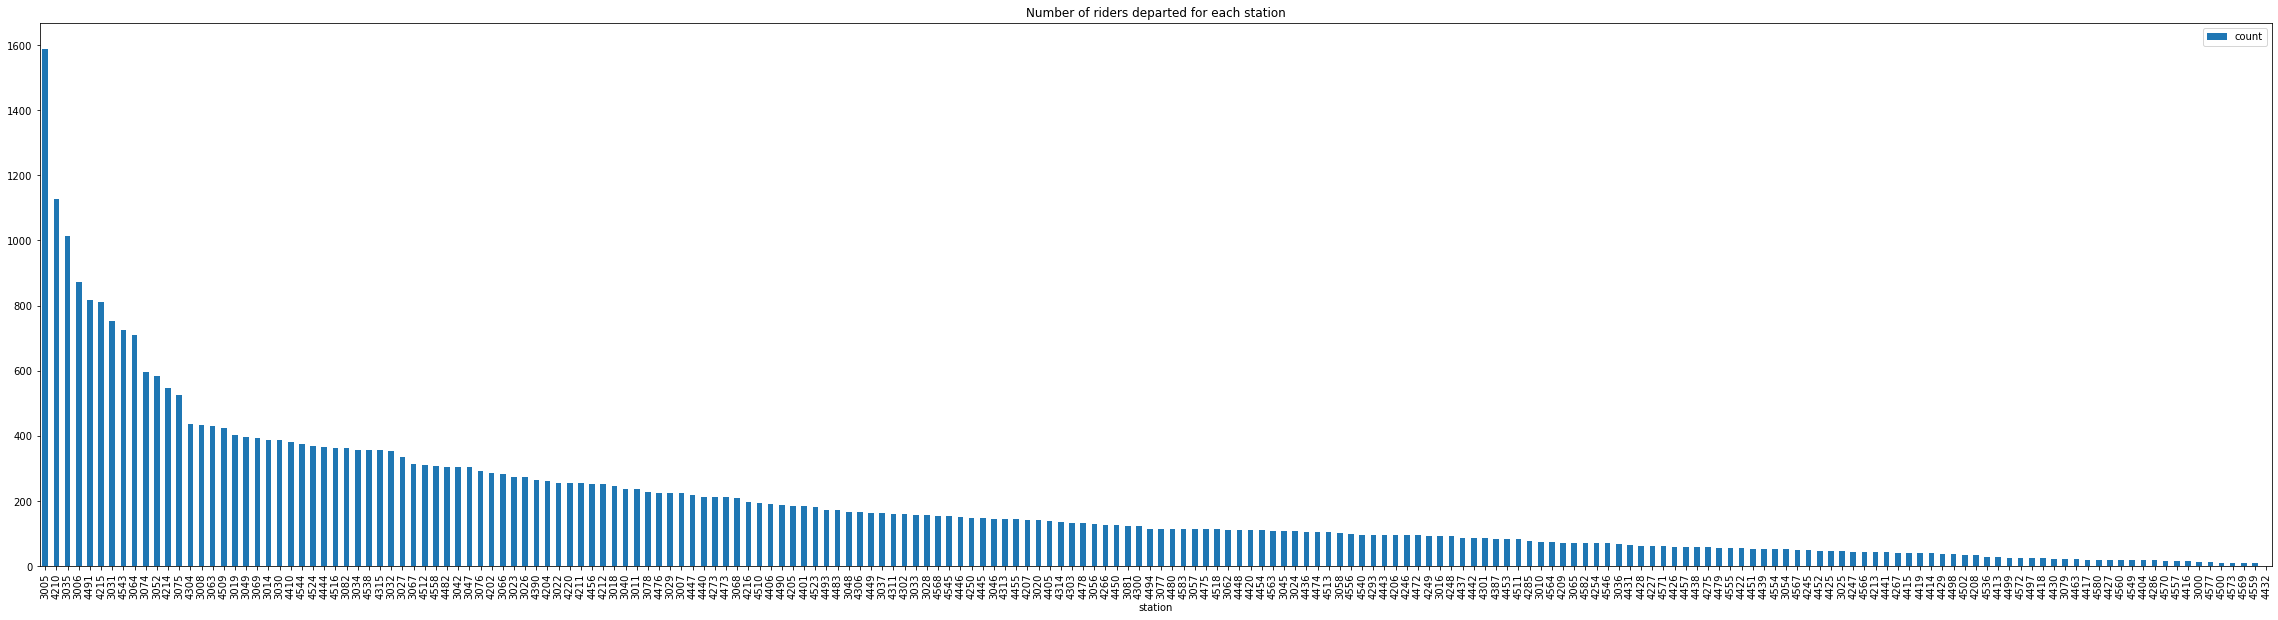

In [51]:
S_station_count.plot.bar(x = 'station', y = 'count', title = 'Number of riders departed for each station', figsize = (40,10)    )

Description of Operation:   
    
    
**This operation plotted a graph that shows the distribution of stations in descending order. We can assume that users are concentrated in top 10 stations.**

I only want to see the columns that shows the part that I'm going to use. 

In [52]:
bike.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37877 entries, 0 to 37876
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   trip_id              37877 non-null  object  
 1   duration             37877 non-null  object  
 2   start_time           37877 non-null  object  
 3   end_time             37877 non-null  object  
 4   start_station        37877 non-null  object  
 5   start_lat            37877 non-null  object  
 6   start_lon            37877 non-null  object  
 7   end_station          37877 non-null  object  
 8   end_lat              37877 non-null  object  
 9   end_lon              37877 non-null  object  
 10  bike_id              37877 non-null  object  
 11  plan_duration        37877 non-null  object  
 12  trip_route_category  37877 non-null  object  
 13  passholder_type      37877 non-null  object  
 14  bike_type            37877 non-null  object  
 15  geometry   

I will list the columns that I'm interested in.

In [53]:
desired_columns = ['trip_id','duration','start_station','start_lat','start_lon']
bike[desired_columns]

,trip_id,duration,start_station,start_lat,start_lon
0,148179433,14,3042,34.049301,-118.238808
1,148179933,18,4404,34.04813,-118.271027
2,148182639,141,4482,34.094372,-118.331009
3,148182739,141,4482,34.094372,-118.331009
4,148180233,15,3074,34.04417,-118.261169
...,...,...,...,...,...
37872,151711987,126,4210,33.984341,-118.47155
37873,151709683,15,3052,34.051102,-118.264557
37874,151710184,6,4516,34.045849,-118.254402
37875,151710183,6,4516,34.045849,-118.254402


I want to store this to a variable and make a copy.

In [54]:
bike_trimmed = bike[desired_columns].copy() 
bike_trimmed

,trip_id,duration,start_station,start_lat,start_lon
0,148179433,14,3042,34.049301,-118.238808
1,148179933,18,4404,34.04813,-118.271027
2,148182639,141,4482,34.094372,-118.331009
3,148182739,141,4482,34.094372,-118.331009
4,148180233,15,3074,34.04417,-118.261169
...,...,...,...,...,...
37872,151711987,126,4210,33.984341,-118.47155
37873,151709683,15,3052,34.051102,-118.264557
37874,151710184,6,4516,34.045849,-118.254402
37875,151710183,6,4516,34.045849,-118.254402


I only want to see the subset of records. I want only the trips that are started in '3005' station.

In [55]:
bike_trimmed[bike_trimmed.start_station == '3005']

,trip_id,duration,start_station,start_lat,start_lon
7,148181033,9,3005,34.0485,-118.258537
10,148188740,249,3005,34.0485,-118.258537
13,148186333,7,3005,34.0485,-118.258537
30,148190036,11,3005,34.0485,-118.258537
64,148193238,22,3005,34.0485,-118.258537
...,...,...,...,...,...
37763,151707524,8,3005,34.0485,-118.258537
37774,151707513,13,3005,34.0485,-118.258537
37796,151707493,32,3005,34.0485,-118.258537
37811,151707709,47,3005,34.0485,-118.258537


There is another way to do this work! Like below:

In [56]:
bike_trimmed.query("start_station == '3005'")

,trip_id,duration,start_station,start_lat,start_lon
7,148181033,9,3005,34.0485,-118.258537
10,148188740,249,3005,34.0485,-118.258537
13,148186333,7,3005,34.0485,-118.258537
30,148190036,11,3005,34.0485,-118.258537
64,148193238,22,3005,34.0485,-118.258537
...,...,...,...,...,...
37763,151707524,8,3005,34.0485,-118.258537
37774,151707513,13,3005,34.0485,-118.258537
37796,151707493,32,3005,34.0485,-118.258537
37811,151707709,47,3005,34.0485,-118.258537


Description of Operation:   

**The operation above trimmed the table and filtered the data to see the station that I'm interested in.**

================
Below is just my scribbles.. ===============

In [30]:
import folium

In [31]:
m = folium.Map()
m